In [28]:
import pandas as pd
caminho_arquivo = "Data/Thyroid_Diff.csv"
df = pd.read_csv(caminho_arquivo)
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


## Descriptive analysis

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset dimensions:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nFirst lines:")
print(df.head())

Dataset dimensions: (383, 17)

Data types:
Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

First lines:
   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        E


Distribution of the 'Recurred' target:
Recurred
No     275
Yes    108
Name: count, dtype: int64


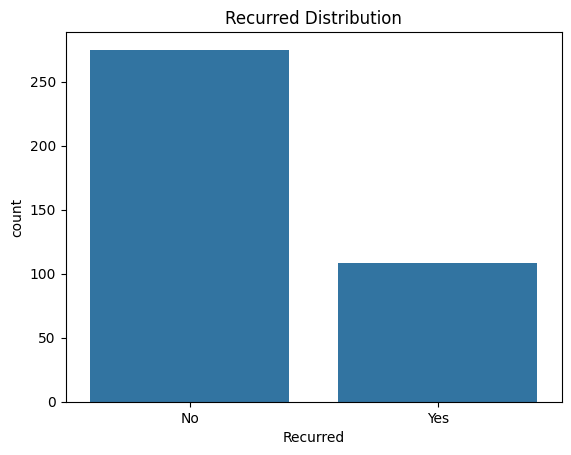


Descriptive statistics of numerical features:
              Age
count  383.000000
mean    40.866841
std     15.134494
min     15.000000
25%     29.000000
50%     37.000000
75%     51.000000
max     82.000000


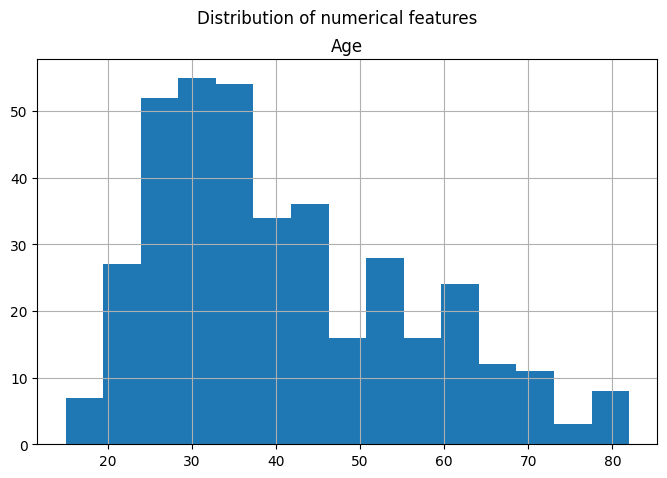

In [30]:
print("\nDistribution of the 'Recurred' target:")
print(df['Recurred'].value_counts())
sns.countplot(x='Recurred', data=df)
plt.title('Recurred Distribution')
plt.show()

# features numéricas
numerical_features = ['Age']  
print("\nDescriptive statistics of numerical features:")
print(df[numerical_features].describe())

# histograma
df[numerical_features].hist(bins=15, figsize=(8,5))
plt.suptitle('Distribution of numerical features')
plt.show()

In [31]:
print(df.columns.tolist())

['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


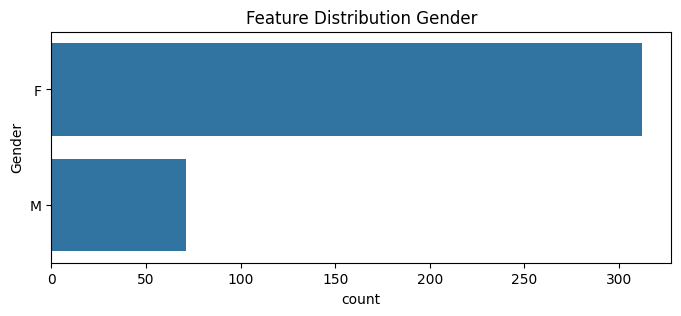

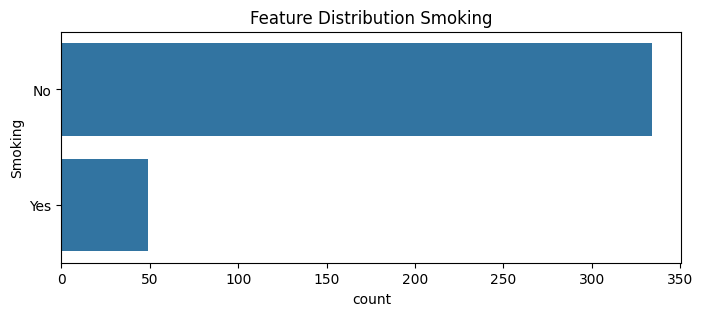

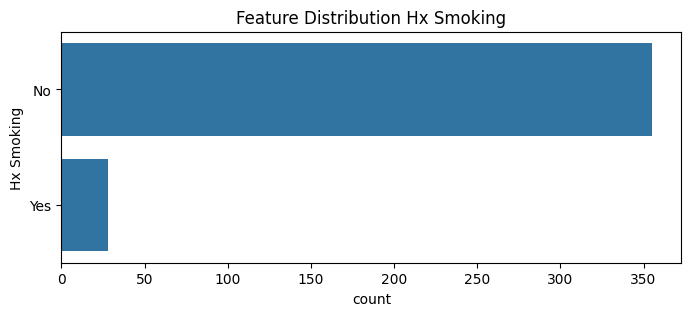

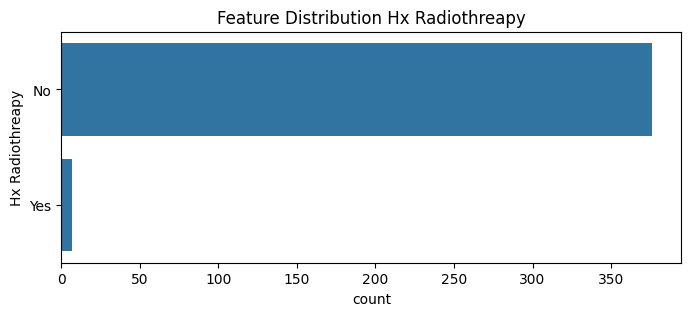

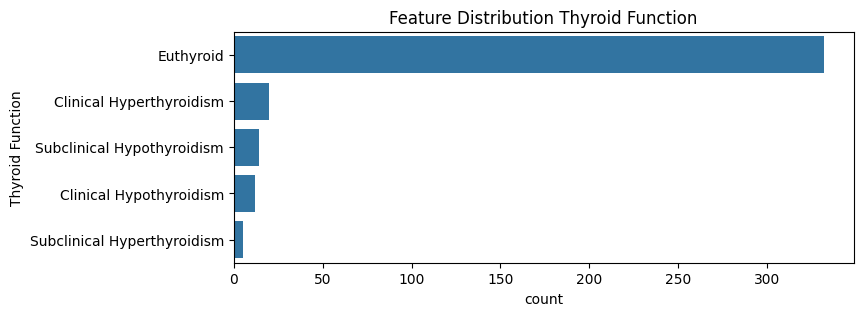

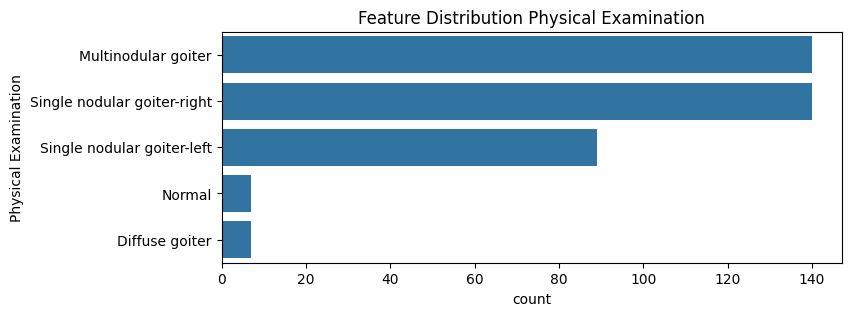

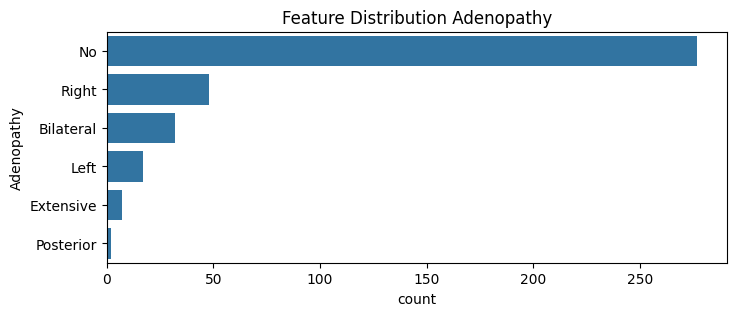

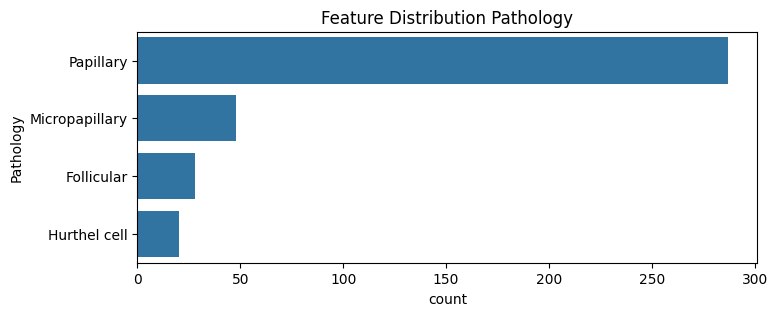

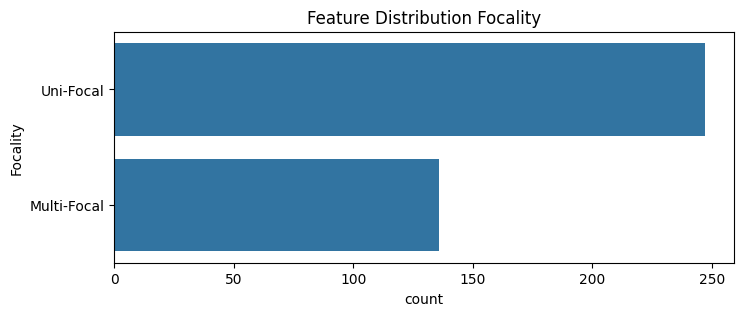

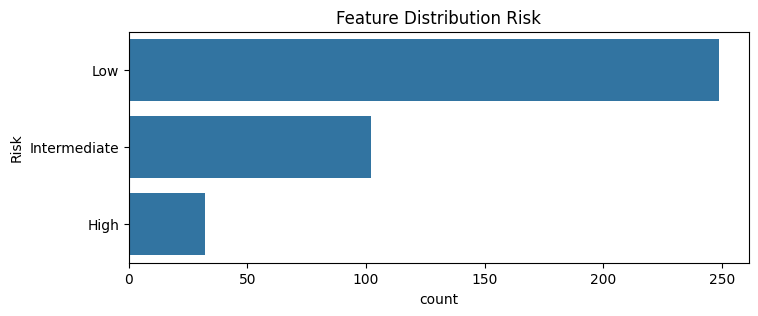

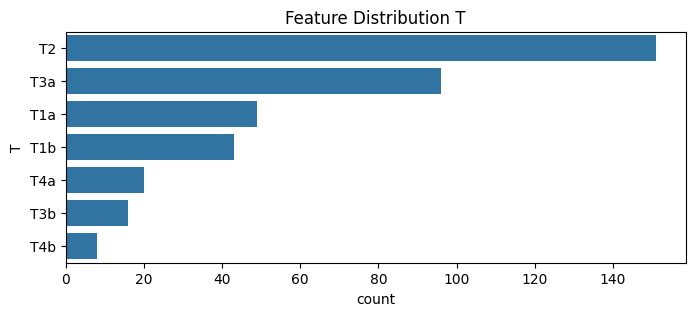

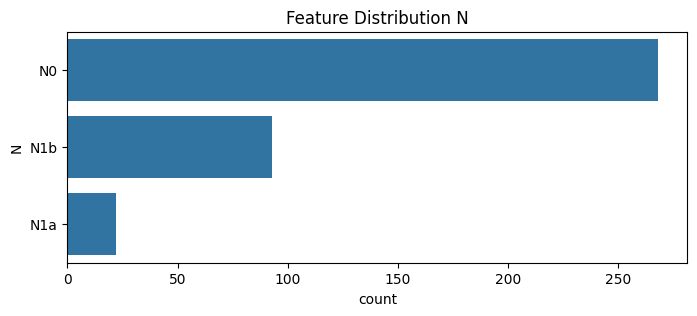

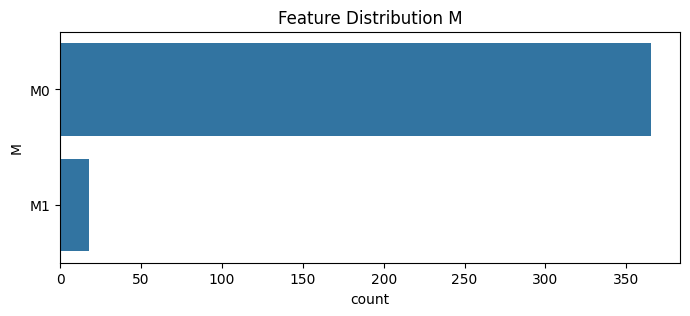

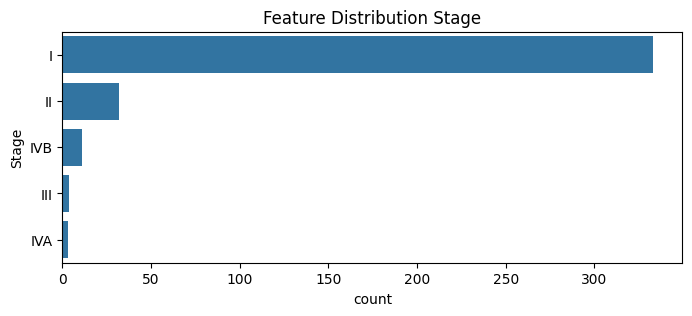

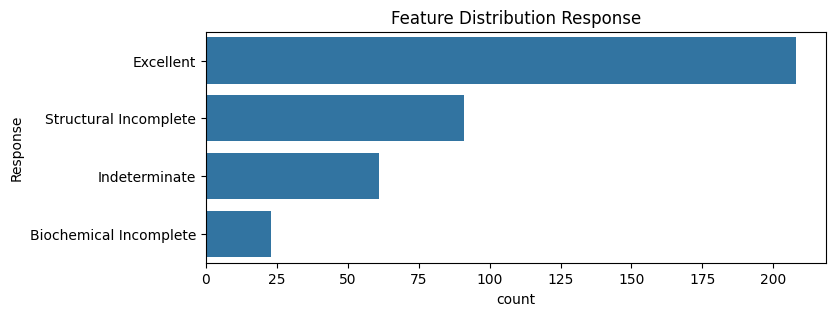

In [32]:
# categorical features 
categorical_features = ['Gender','Smoking','Hx Smoking','Hx Radiothreapy',
                        'Thyroid Function','Physical Examination','Adenopathy',
                        'Pathology','Focality','Risk','T','N','M','Stage','Response']

for col in categorical_features:
    plt.figure(figsize=(8,3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Feature Distribution {col}')
    plt.show()

In [33]:
df.select_dtypes(include=['number']).columns

Index(['Age'], dtype='object')

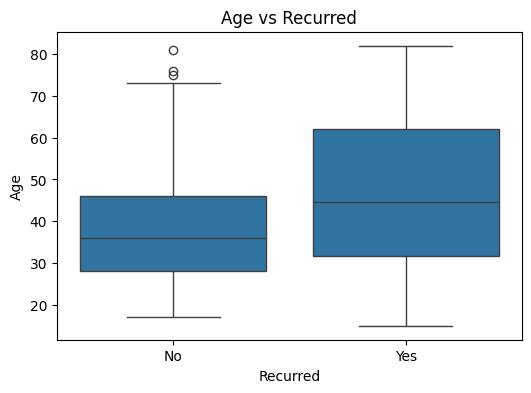

In [34]:
# boxplots de features num x target
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Recurred', y=col, data=df)
    plt.title(f'{col} vs Recurred')
    plt.show()

## Models

In [35]:
#ML preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
df['Recurred'] = df['Recurred'].map({'No':0, 'Yes':1})      # transformando target em 0 e 1

# one-Hot encoding of categorical features 
df_encoded = pd.get_dummies(df.drop('Recurred', axis=1), drop_first=True)
X = df_encoded
y = df['Recurred']
print(df['Recurred'].unique())

print(y)
print("\nDimension after encoding:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
len(X_train_scaled)

[0 1]
0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Recurred, Length: 383, dtype: int64

Dimension after encoding: (383, 40)


306

In [36]:
y_train

165    0
321    1
220    0
94     0
232    1
      ..
71     0
106    0
270    0
348    1
102    0
Name: Recurred, Length: 306, dtype: int64

In [37]:
y.isna().sum()  #checking if there is NaN

0

In [38]:
#random forest test model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

[[58  0]
 [ 1 18]]


In [43]:
from imblearn.over_sampling import SMOTE

# balance the data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print(len(X_train_bal), len(y_train_bal))

434 434
